In [2]:
# import library that we're using to clean this data
import pandas as pd

In [51]:
# import data that we get from faculty
record = pd.read_csv("engineeringstudent_record.csv")

# check the data we get
record.head()

,TEMP_ID,SEX,DEPARTMENT,TCAS ROUND,FIRST_GPA,SECOND_GPA,GPAX,COMP_PROG_REG_SEM,COMP_PROG_GRADE,COMP_PROG_ATMPT,EXPLORE_ENG_GRADE,EXPLORE_ENG_ATMPT,ENG_MATERIAL_GRADE,ENG_MATERIAL_ATMPT,GEN_CHEM_GRADE,GEN_CHEM_ATMPT,GEN_CHEMLAB_GRADE,GEN_CHEMLAB_ATMPT,ENG_DRAWING_GRADE,ENG_DRAWING_ATMPT
0,A001,F,ภาควิชาวิศวกรรมไฟฟ้า,TCAS3 Admissions,3.21,3.41,3.31,1.0,D+,1.0,A,1.0,B+,1.0,B,1.0,B,1.0,B+,1.0
1,A002,F,ภาควิชาวิศวกรรมเคมี,TCAS3 Admissions,2.50,2.59,2.54,1.0,C,1.0,A,1.0,C+,1.0,C+,1.0,C+,1.0,B,1.0
2,A003,M,ภาควิชาวิศวกรรมอุตสาหการ,TCAS3 Admissions,3.45,3.03,3.25,1.0,A,1.0,A,1.0,B,1.0,C+,1.0,C+,1.0,C+,1.0
3,A004,M,ไม่สังกัดภาควิชา/เทียบเท่า,TCAS3 Admissions,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A005,F,ภาควิชาวิศวกรรมคอมพิวเตอร์,TCAS3 Admissions,4.00,3.82,3.92,1.0,A,1.0,A,1.0,A,1.0,B+,1.0,A,1.0,A,1.0


In [6]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TEMP_ID             761 non-null    object 
 1   SEX                 761 non-null    object 
 2   DEPARTMENT          761 non-null    object 
 3   TCAS ROUND          761 non-null    object 
 4   FIRST_GPA           761 non-null    float64
 5   SECOND_GPA          756 non-null    float64
 6   GPAX                749 non-null    float64
 7   COMP_PROG_REG_SEM   746 non-null    float64
 8   COMP_PROG_GRADE     742 non-null    object 
 9   COMP_PROG_ATMPT     746 non-null    float64
 10  EXPLORE_ENG_GRADE   738 non-null    object 
 11  EXPLORE_ENG_ATMPT   742 non-null    float64
 12  ENG_MATERIAL_GRADE  666 non-null    object 
 13  ENG_MATERIAL_ATMPT  670 non-null    float64
 14  GEN_CHEM_GRADE      743 non-null    object 
 15  GEN_CHEM_ATMPT      743 non-null    float64
 16  GEN_CHEM

###You would see that the data have many columns, I will explain them briefly to you, so you can understand what each columns mean.

TEMP_ID : temporary id of that Chula Engineering student   
SEX : sex  
DEPARTMENT : department of chula engineering  
TCAS ROUND : the tcas round that student joined in  
FIRST_GPA : 1st semester gpa  
SECOND_GPA : 2nd semester gpa  
GPAX : 1st year average grade (calculate from first and second gpa)  
COMP_PROG_REG_SEM : the semester that this student study **Com Prog** subject   
COMP_PROG_ATMPT : how many times that this student study **Com Prog** subject

In [52]:
# Since the value in column of tcas round is a bit confused to understand
# I would consider change the round to 1,2,3
# 1 represent portfolio round, 2 represent Quota round, and 3 represent Admission Round

new_col = {'TCAS1 Portfolio' : 1, 'TCAS2 Quota' : 2, "TCAS3 Admissions" : 3}
record.replace(new_col, inplace=True)
record.head()

<ipython-input-52-674a58aa955a>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  record.replace(new_col, inplace=True)


,TEMP_ID,SEX,DEPARTMENT,TCAS ROUND,FIRST_GPA,SECOND_GPA,GPAX,COMP_PROG_REG_SEM,COMP_PROG_GRADE,COMP_PROG_ATMPT,EXPLORE_ENG_GRADE,EXPLORE_ENG_ATMPT,ENG_MATERIAL_GRADE,ENG_MATERIAL_ATMPT,GEN_CHEM_GRADE,GEN_CHEM_ATMPT,GEN_CHEMLAB_GRADE,GEN_CHEMLAB_ATMPT,ENG_DRAWING_GRADE,ENG_DRAWING_ATMPT
0,A001,F,ภาควิชาวิศวกรรมไฟฟ้า,3,3.21,3.41,3.31,1.0,D+,1.0,A,1.0,B+,1.0,B,1.0,B,1.0,B+,1.0
1,A002,F,ภาควิชาวิศวกรรมเคมี,3,2.50,2.59,2.54,1.0,C,1.0,A,1.0,C+,1.0,C+,1.0,C+,1.0,B,1.0
2,A003,M,ภาควิชาวิศวกรรมอุตสาหการ,3,3.45,3.03,3.25,1.0,A,1.0,A,1.0,B,1.0,C+,1.0,C+,1.0,C+,1.0
3,A004,M,ไม่สังกัดภาควิชา/เทียบเท่า,3,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A005,F,ภาควิชาวิศวกรรมคอมพิวเตอร์,3,4.00,3.82,3.92,1.0,A,1.0,A,1.0,A,1.0,B+,1.0,A,1.0,A,1.0


In [53]:
# check the value of each tcas round
print(record["TCAS ROUND"].value_counts())

record.shape

TCAS ROUND
3    557
1    188
2     16
Name: count, dtype: int64


(761, 20)

In [54]:
# change all grade from categorical(order) to numerical
# such as A = 4, B+ = 3.5 and so on.
record.replace({"SEX" : {"F" : "FM"}}, inplace=True)
grade = {"A" : 4, "B+" : 3.5, "B" : 3, "C+" : 2.5, "C" : 2, "D+" : 1.5, "D" : 1, "F" : 0}
record.replace(grade, inplace=True)

record.head()

,TEMP_ID,SEX,DEPARTMENT,TCAS ROUND,FIRST_GPA,SECOND_GPA,GPAX,COMP_PROG_REG_SEM,COMP_PROG_GRADE,COMP_PROG_ATMPT,EXPLORE_ENG_GRADE,EXPLORE_ENG_ATMPT,ENG_MATERIAL_GRADE,ENG_MATERIAL_ATMPT,GEN_CHEM_GRADE,GEN_CHEM_ATMPT,GEN_CHEMLAB_GRADE,GEN_CHEMLAB_ATMPT,ENG_DRAWING_GRADE,ENG_DRAWING_ATMPT
0,A001,FM,ภาควิชาวิศวกรรมไฟฟ้า,3,3.21,3.41,3.31,1.0,1.5,1.0,4,1.0,3.5,1.0,3,1.0,3,1.0,3.5,1.0
1,A002,FM,ภาควิชาวิศวกรรมเคมี,3,2.50,2.59,2.54,1.0,2,1.0,4,1.0,2.5,1.0,2.5,1.0,2.5,1.0,3,1.0
2,A003,M,ภาควิชาวิศวกรรมอุตสาหการ,3,3.45,3.03,3.25,1.0,4,1.0,4,1.0,3,1.0,2.5,1.0,2.5,1.0,2.5,1.0
3,A004,M,ไม่สังกัดภาควิชา/เทียบเท่า,3,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A005,FM,ภาควิชาวิศวกรรมคอมพิวเตอร์,3,4.00,3.82,3.92,1.0,4,1.0,4,1.0,4,1.0,3.5,1.0,4,1.0,4,1.0


In [55]:
# drop the columns that has no meaning to our model or maybe cause the data leakage.
# Department (data leakage), Second_GPA (Second gpa is our target to predict), TEMP_ID (no meaning), GPAX(data leakage)
record.drop(["TEMP_ID", "GPAX", "DEPARTMENT"], axis=1, inplace=True)
record.shape

(761, 17)

In [56]:
# since we have 761 rows, drop rows that have missing value on column more than 50% of overall columns
threshold = 0.5*(record.shape[1])

record.dropna(axis=0, thresh=threshold, inplace=True)
record.shape

(751, 17)

In [57]:
# check our data
print(record.isna().sum())

record.head()

SEX                    0
TCAS ROUND             0
FIRST_GPA              0
SECOND_GPA             3
COMP_PROG_REG_SEM      7
COMP_PROG_GRADE        9
COMP_PROG_ATMPT        7
EXPLORE_ENG_GRADE     13
EXPLORE_ENG_ATMPT     11
ENG_MATERIAL_GRADE    87
ENG_MATERIAL_ATMPT    85
GEN_CHEM_GRADE         8
GEN_CHEM_ATMPT         8
GEN_CHEMLAB_GRADE     10
GEN_CHEMLAB_ATMPT     10
ENG_DRAWING_GRADE     88
ENG_DRAWING_ATMPT     86
dtype: int64


,SEX,TCAS ROUND,FIRST_GPA,SECOND_GPA,COMP_PROG_REG_SEM,COMP_PROG_GRADE,COMP_PROG_ATMPT,EXPLORE_ENG_GRADE,EXPLORE_ENG_ATMPT,ENG_MATERIAL_GRADE,ENG_MATERIAL_ATMPT,GEN_CHEM_GRADE,GEN_CHEM_ATMPT,GEN_CHEMLAB_GRADE,GEN_CHEMLAB_ATMPT,ENG_DRAWING_GRADE,ENG_DRAWING_ATMPT
0,FM,3,3.21,3.41,1.0,1.5,1.0,4,1.0,3.5,1.0,3,1.0,3,1.0,3.5,1.0
1,FM,3,2.50,2.59,1.0,2,1.0,4,1.0,2.5,1.0,2.5,1.0,2.5,1.0,3,1.0
2,M,3,3.45,3.03,1.0,4,1.0,4,1.0,3,1.0,2.5,1.0,2.5,1.0,2.5,1.0
4,FM,3,4.00,3.82,1.0,4,1.0,4,1.0,4,1.0,3.5,1.0,4,1.0,4,1.0
5,M,3,3.53,3.47,1.0,4,1.0,4,1.0,4,1.0,3.5,1.0,4,1.0,4,1.0


##In our previous model that I did for my project, I only use the features of sex, tcas round, and first semester gpa  

### So now that I have some Machine Learning knowledge and pandas, I'll show you both of the model. First, 4 features (sex, tcas round, first semester gpa, and com_prog_reg_sem), Second,  

First model, Linear Regression of 4 features (sex, 1st sem gpa, tcas round, and semester that they study comp prog

In [133]:
# copy the record dataset to create first model
firstmodel = record.copy()

firstmodel.head()

,SEX,TCAS ROUND,FIRST_GPA,SECOND_GPA,COMP_PROG_REG_SEM,COMP_PROG_GRADE,COMP_PROG_ATMPT,EXPLORE_ENG_GRADE,EXPLORE_ENG_ATMPT,ENG_MATERIAL_GRADE,ENG_MATERIAL_ATMPT,GEN_CHEM_GRADE,GEN_CHEM_ATMPT,GEN_CHEMLAB_GRADE,GEN_CHEMLAB_ATMPT,ENG_DRAWING_GRADE,ENG_DRAWING_ATMPT
0,FM,3,3.21,3.41,1.0,1.5,1.0,4,1.0,3.5,1.0,3,1.0,3,1.0,3.5,1.0
1,FM,3,2.50,2.59,1.0,2,1.0,4,1.0,2.5,1.0,2.5,1.0,2.5,1.0,3,1.0
2,M,3,3.45,3.03,1.0,4,1.0,4,1.0,3,1.0,2.5,1.0,2.5,1.0,2.5,1.0
4,FM,3,4.00,3.82,1.0,4,1.0,4,1.0,4,1.0,3.5,1.0,4,1.0,4,1.0
5,M,3,3.53,3.47,1.0,4,1.0,4,1.0,4,1.0,3.5,1.0,4,1.0,4,1.0


In [134]:
firstmodel.drop(firstmodel.loc[firstmodel["COMP_PROG_REG_SEM"] == 3].index, axis=0, inplace=True)
firstmodel['COMP_PROG_REG_SEM'].value_counts()

,count
COMP_PROG_REG_SEM,
2.0,371
1.0,370


In [135]:
# drop others features
col = ["COMP_PROG_GRADE", "COMP_PROG_ATMPT", "EXPLORE_ENG_GRADE", "EXPLORE_ENG_ATMPT", "GEN_CHEM_GRADE", "GEN_CHEM_ATMPT", "GEN_CHEMLAB_GRADE",
       "GEN_CHEMLAB_ATMPT", "ENG_DRAWING_GRADE", "ENG_DRAWING_ATMPT", "ENG_MATERIAL_GRADE", "ENG_MATERIAL_ATMPT"]
firstmodel.drop(col, axis=1, inplace=True)

firstmodel.head()

,SEX,TCAS ROUND,FIRST_GPA,SECOND_GPA,COMP_PROG_REG_SEM
0,FM,3,3.21,3.41,1.0
1,FM,3,2.50,2.59,1.0
2,M,3,3.45,3.03,1.0
4,FM,3,4.00,3.82,1.0
5,M,3,3.53,3.47,1.0


In [136]:
firstmodel.isna().sum()
print(firstmodel["COMP_PROG_REG_SEM"].mode())

0    2.0
Name: COMP_PROG_REG_SEM, dtype: float64


In [137]:
# since there are missing values, I'll impute the second_gpa by mean and comp_prog_reg_sem by mode
firstmodel["SECOND_GPA"] = firstmodel["SECOND_GPA"].fillna(value=firstmodel["SECOND_GPA"].mean())

mode = firstmodel["COMP_PROG_REG_SEM"].mode()[0]
firstmodel["COMP_PROG_REG_SEM"] = firstmodel["COMP_PROG_REG_SEM"].fillna(value=mode)

In [138]:
firstmodel["COMP_PROG_REG_SEM"].value_counts()

,count
COMP_PROG_REG_SEM,
2.0,378
1.0,370


In [139]:
# import libraries that we will be using to create and evaluate this model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import r2_score
# first we have do the OneHotEncoder for the sex, tcas round, and comp_prog_reg_sem. Although the tcas round seems like ordinal, but its not.
# There's nothing show that student from TCAS ROUND 2 is better than Round 3 or 1
firstmodel = pd.get_dummies(firstmodel, columns=["SEX", "TCAS ROUND", "COMP_PROG_REG_SEM"], drop_first=True)

firstmodel.head()

,FIRST_GPA,SECOND_GPA,SEX_M,TCAS ROUND_2,TCAS ROUND_3,COMP_PROG_REG_SEM_2.0
0,3.21,3.41,False,False,True,False
1,2.50,2.59,False,False,True,False
2,3.45,3.03,True,False,True,False
4,4.00,3.82,False,False,True,False
5,3.53,3.47,True,False,True,False


In [140]:
X = firstmodel.drop("SECOND_GPA", axis=1)
y = firstmodel["SECOND_GPA"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# fit the model
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)

# predict
pred = linearmodel.predict(X_test)

# then we evaluate the model by MAE, MSE, and create the distplot of residual
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r_sq = r2_score(y_test, pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R Squared : {r_sq}")

coefficients = pd.Series(linearmodel.coef_, index=X.columns)
print("\nFeature Importances (Coefficients):")
print(coefficients)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print("\nComparison of Predictions vs. Actual:")
print(comparison_df.head())



Mean Squared Error: 0.36827195905792015
Mean Absolute Error: 0.3757222369840978
R Squared : 0.4166531365976176

Feature Importances (Coefficients):
FIRST_GPA                0.792433
SEX_M                   -0.023443
TCAS ROUND_2             0.103633
TCAS ROUND_3            -0.142192
COMP_PROG_REG_SEM_2.0    0.400125
dtype: float64

Comparison of Predictions vs. Actual:
     Actual  Predicted
697    2.00   2.653154
44     3.38   2.649362
618    2.66   2.510516
322    3.37   3.303396
207    3.05   3.184531


<ipython-input-141-43850f195a91>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='SECOND_GPA', ylabel='Density'>

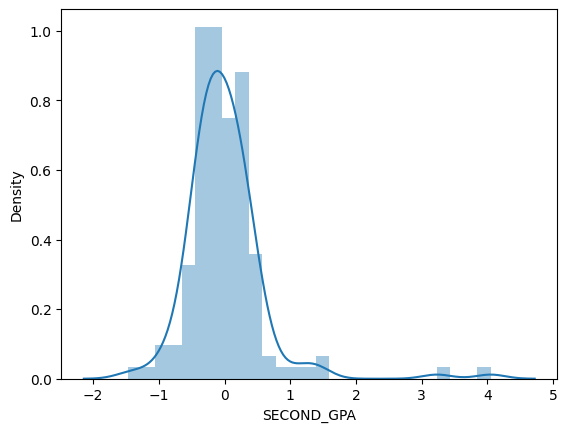

In [141]:
import seaborn as sns

residual = pred - y_test

sns.distplot(residual)

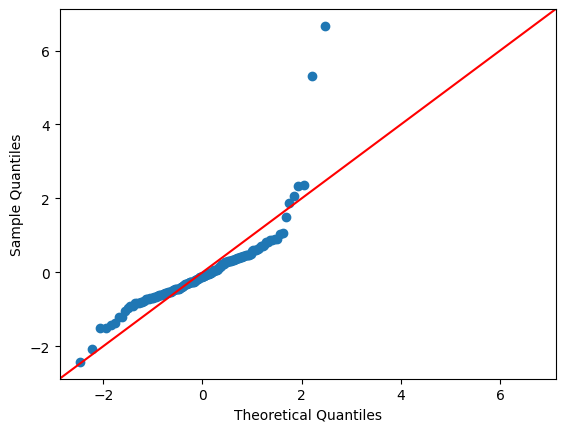

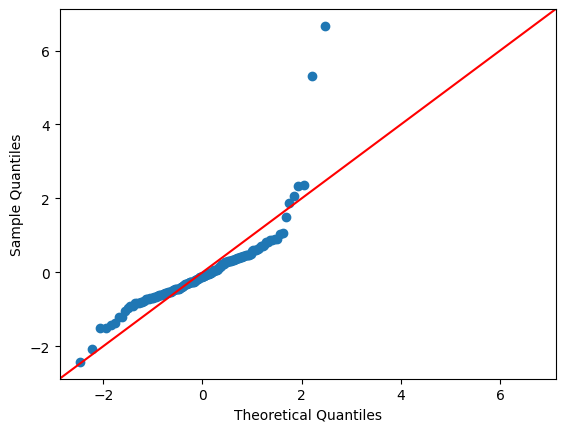

In [142]:
from statsmodels.api import qqplot
qqplot(residual, fit=True, line='45')